In [3]:
import requests

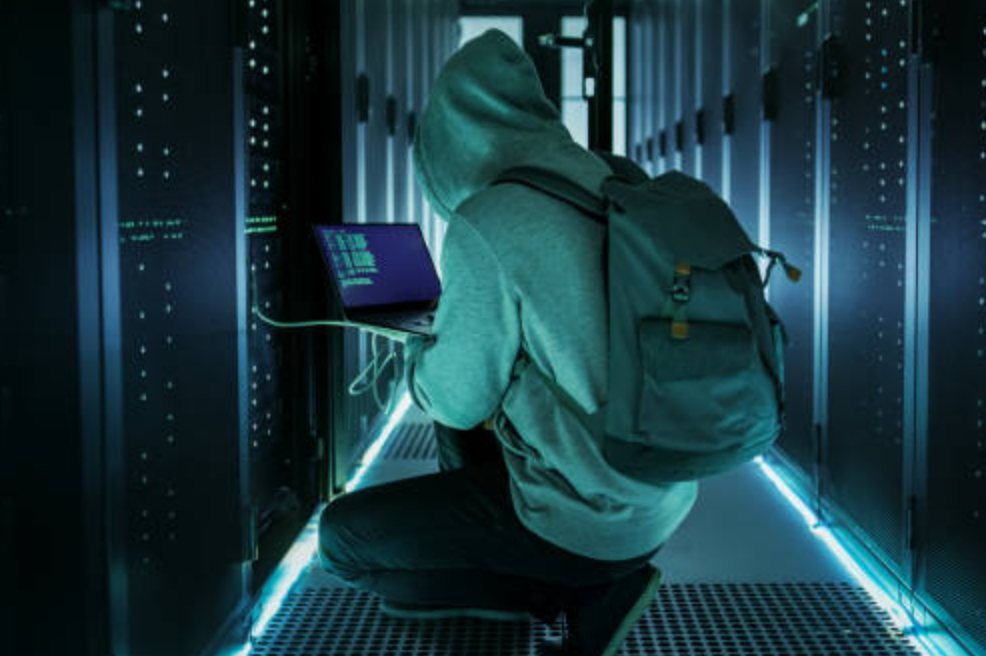

# REQUESTS

Библиотека `requests` в Python является одной из наиболее популярных и широко используемых библиотек для выполнения HTTP-запросов. Она предоставляет простой и интуитивно понятный интерфейс для отправки запросов, доступа к содержимому ответа и обработки различных аспектов HTTP-коммуникации.

## Основные Функции и Возможности

1. Выполнение HTTP-запросов: requests позволяет отправлять все основные типы HTTP-запросов, такие как **GET, POST, PUT, DELETE** и другие.

2. Параметры и данные: Поддерживает передачу параметров в URL-адресах, данных формы, заголовков и файлов.

3. Автоматическая обработка cookies: Умеет автоматически обрабатывать cookies, что упрощает работу с сессиями и аутентификацией.

4. Пользовательские заголовки и аутентификация: Позволяет настроить пользовательские заголовки запросов и поддерживает различные способы аутентификации.

5. SSL-сертификаты: Поддерживает работу с SSL-сертификатами для обеспечения безопасности HTTPS-соединений.

6. Прокси: Поддерживает отправку запросов через HTTP/HTTPS-прокси.

7. Управление исключениями: Предоставляет механизм для обработки исключений, связанных с сетевыми запросами.

# Пример GET-запроса

[URL](https://www.sulpak.kg/g/kofemashina_delonghi_esam_610_74_931_105) - Страница с кофемашиной.

In [4]:
response = requests.get('https://www.sulpak.kg/g/kofemashina_delonghi_esam_610_74_931_105')

In [5]:
response.text

'\n\n\n<!DOCTYPE html>\n<html lang="ru">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n\n    <meta name="google-site-verification" content="8DdPmaHCjZLSfMK0pKaMtLa6SIqtHHeWJCYYqUTkmGU" />\n    <meta http-equiv="Cache-control" content="private,max-age=600">\n\n    <link rel="preconnect" href="https://sale.sulpak.kz" />\n    <link rel="preload" href="https://object.pscloud.io/cms/wwwroot/fonts/Montserrat-Light.woff2" as="font" type="font/woff2" crossorigin="anonymous"> <link rel="preload" href="https://object.pscloud.io/cms/wwwroot/fonts/Montserrat-Regular.woff2" as="font" type="font/woff2" crossorigin="anonymous">\n    <link rel="preload" href="https://object.pscloud.io/cms/wwwroot/fonts/Montserrat-Medium.woff2" as="font" type="font/woff2" crossorigin="anonymous">\n    <link rel="preload" href="https://object.pscloud.io/cms/wwwroot/fonts/Montserrat-Bold.woff2" a

Мы получили знакомый нам вид HTML. Наведем порядок.

In [6]:
from bs4 import BeautifulSoup

In [7]:
soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="ru">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta content="8DdPmaHCjZLSfMK0pKaMtLa6SIqtHHeWJCYYqUTkmGU" name="google-site-verification">
   <meta content="private,max-age=600" http-equiv="Cache-control"/>
   <link href="https://sale.sulpak.kz" rel="preconnect"/>
   <link as="font" crossorigin="anonymous" href="https://object.pscloud.io/cms/wwwroot/fonts/Montserrat-Light.woff2" rel="preload" type="font/woff2"/>
   <link as="font" crossorigin="anonymous" href="https://object.pscloud.io/cms/wwwroot/fonts/Montserrat-Regular.woff2" rel="preload" type="font/woff2"/>
   <link as="font" crossorigin="anonymous" href="https://object.pscloud.io/cms/wwwroot/fonts/Montserrat-Medium.woff2" rel="preload" type="font/woff2"/>
   <link as="font" crossorigin="anonymous" href="https://object.pscloud.io/cms/wwwroot/fonts/Montserrat-Bold.woff2" rel="p

Разумеется, мы не будем в этом треше ничего искать сами. Всю навигацию будем осуществлять в браузере непосредственно.

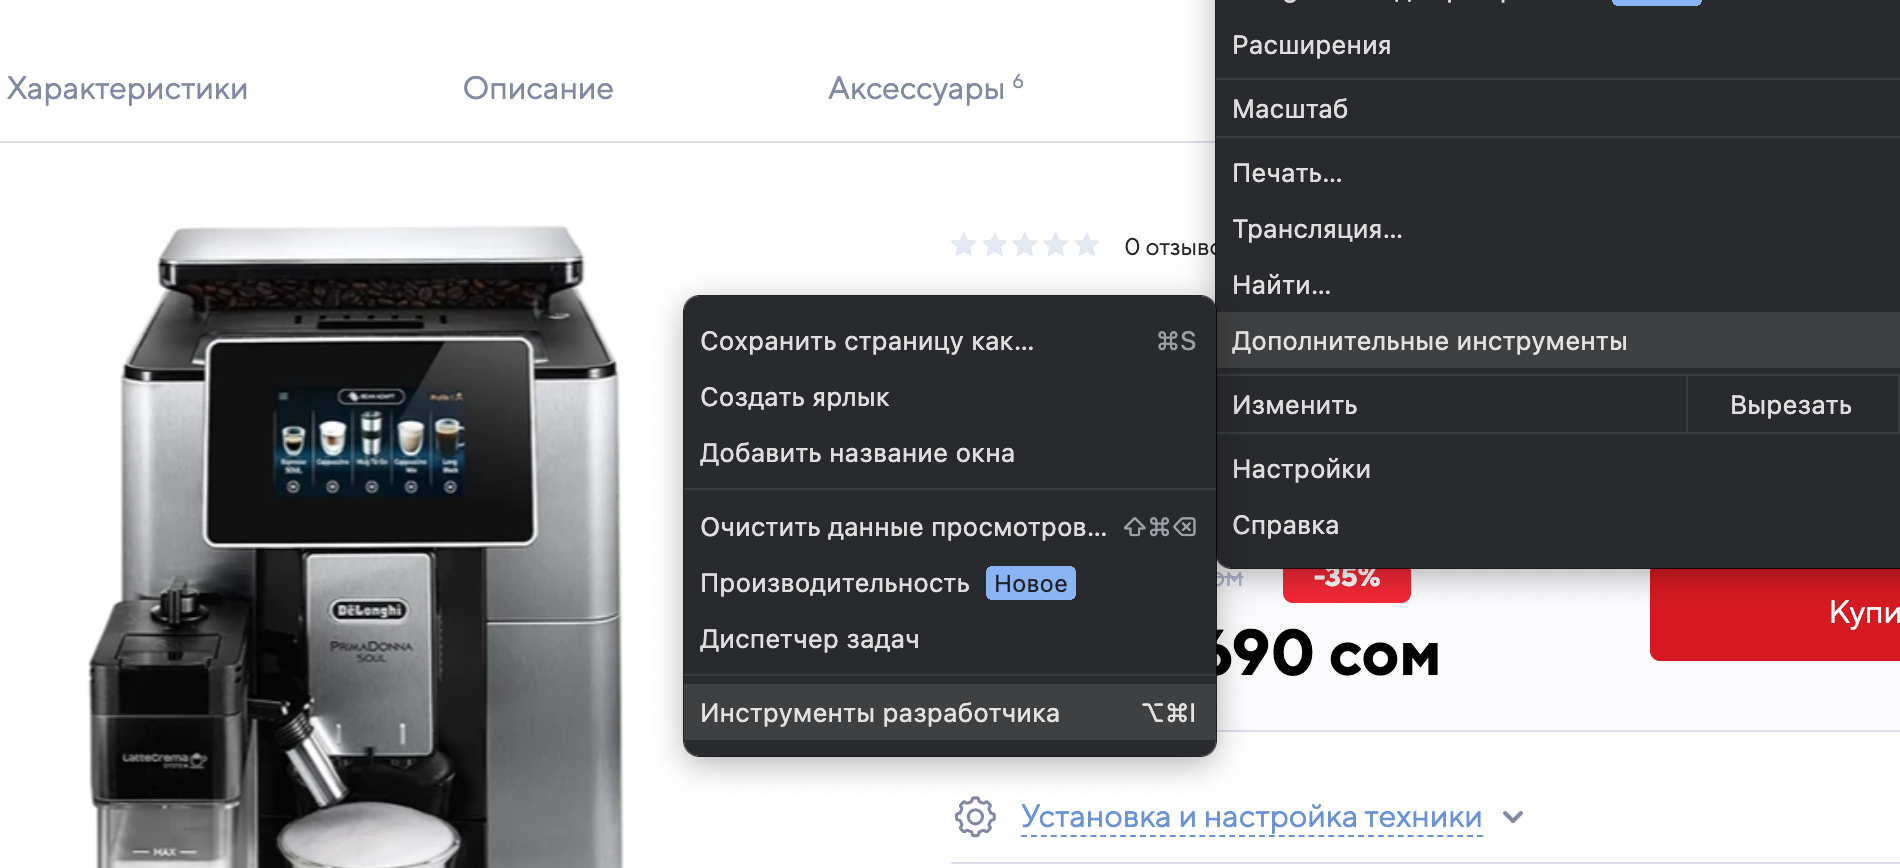

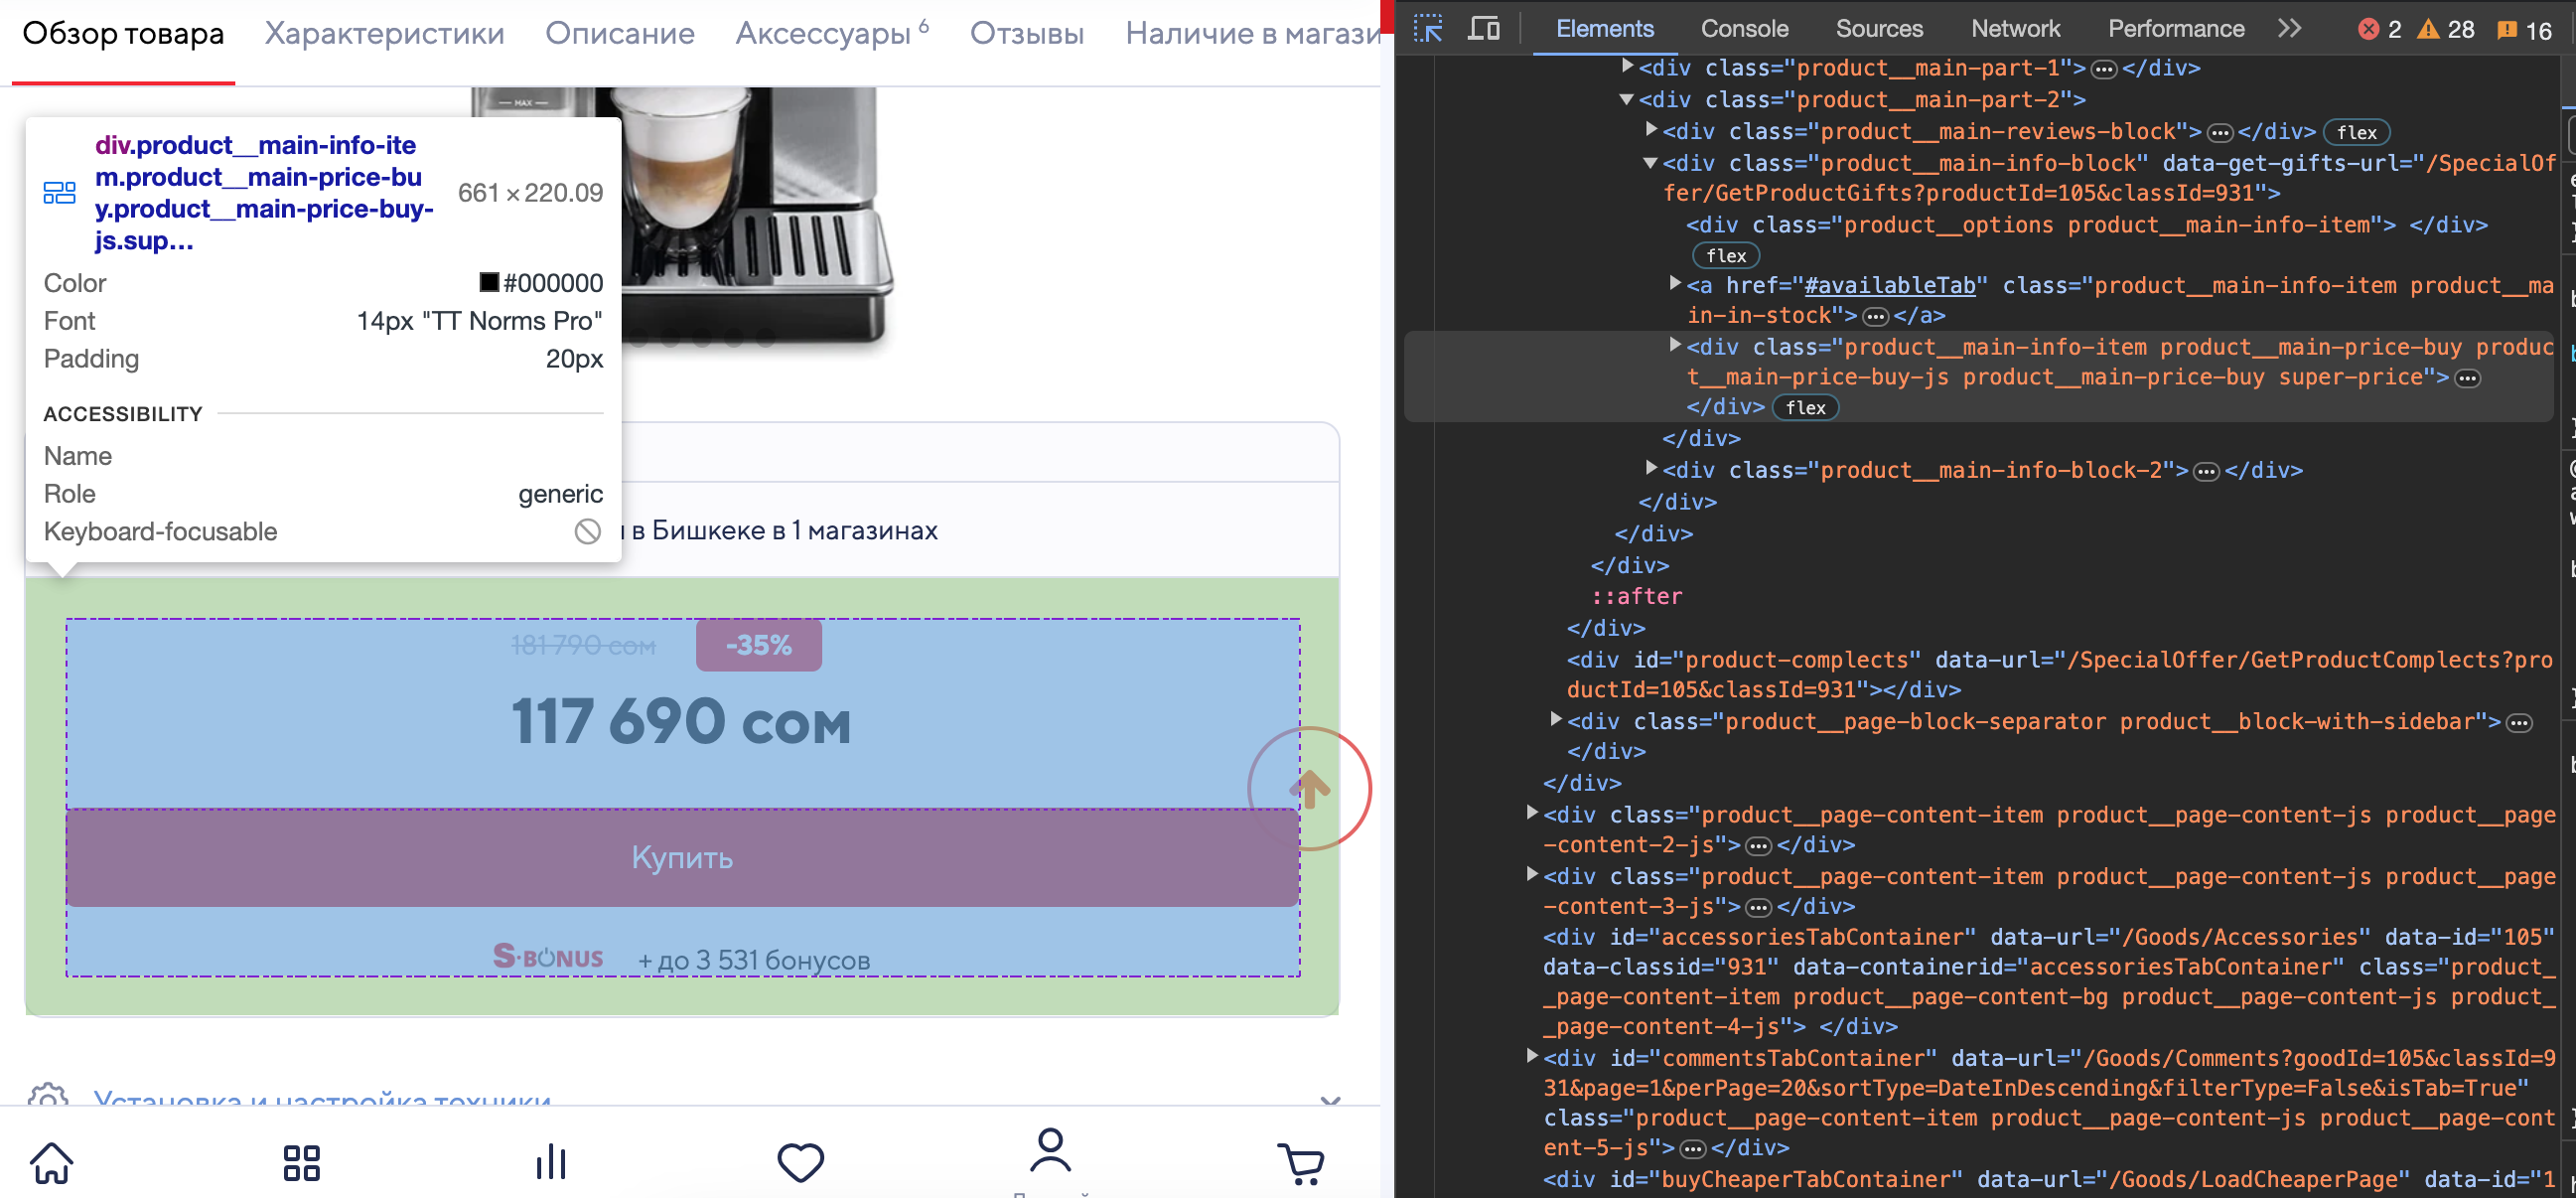

Нашел блок где размещена стоимость кофемашины. Это class 'product__price'

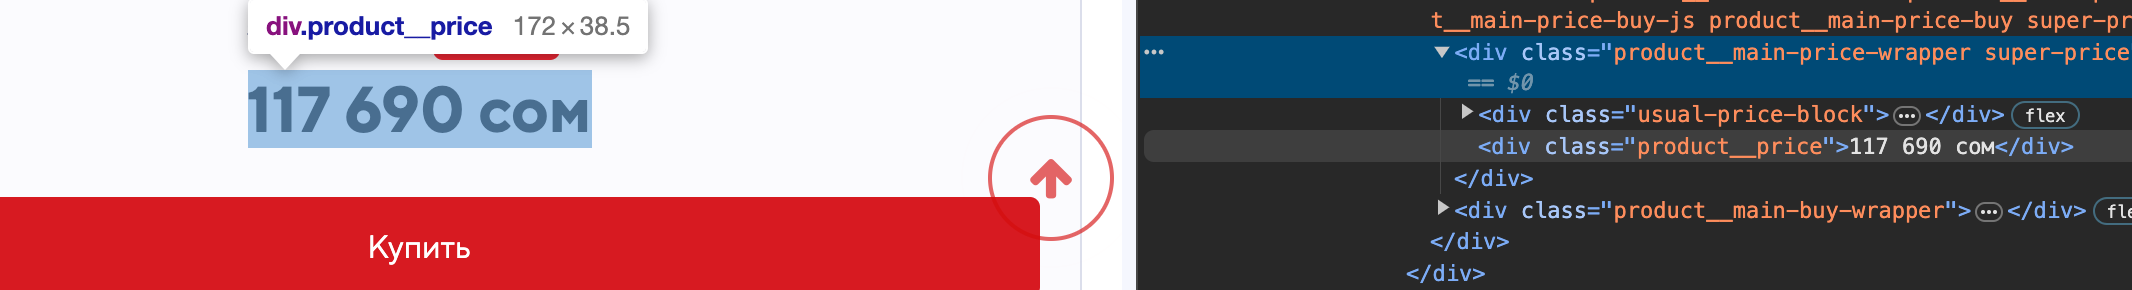

In [9]:
soup.find('div', class_ = 'product__price')

<div class="product__price">178 990 сом</div>

In [10]:
soup.find('div', class_ = 'product__price').text

'178 990 сом'

# Спарсим характеристики

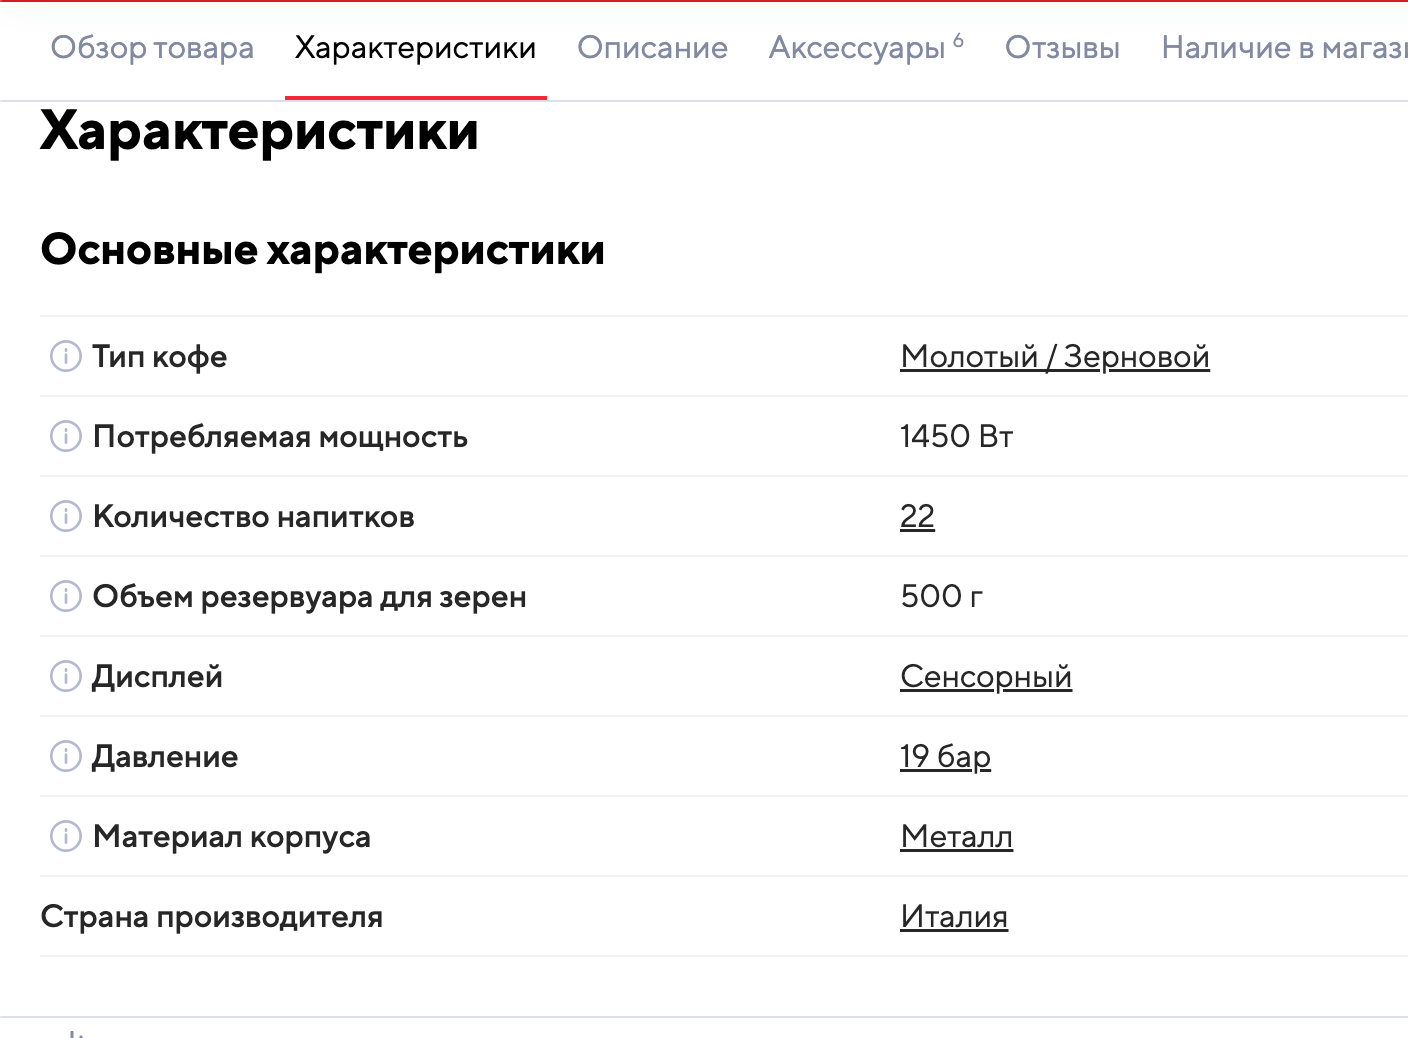

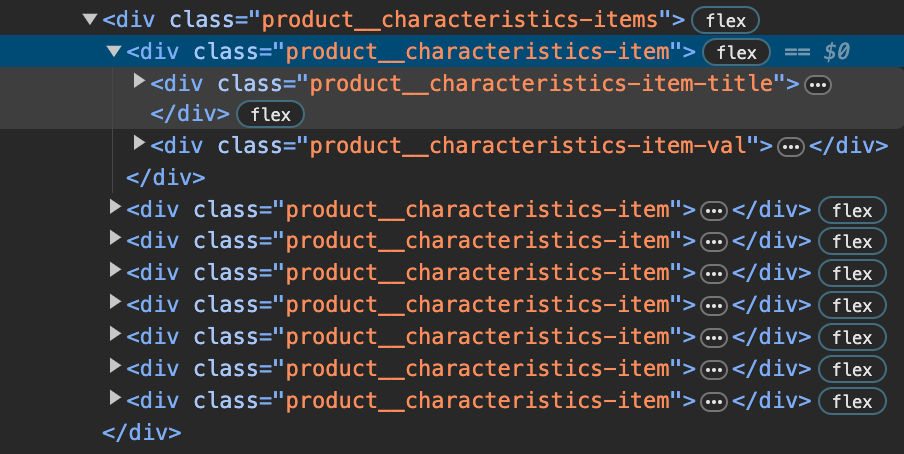

In [ ]:
character = soup.find_all('div', class_ = 'product__characteristics-item')

In [ ]:
for i in character:
  print(i.find('div', class_ = 'product__characteristics-item-title').text.strip())

Потребляемая мощность
Объем резервуара для зерен
Давление
Материал жерновов
Тип управления
Индикация
Тип кофе
Потребляемая мощность
Количество напитков
Объем резервуара для зерен
Дисплей
Давление
Материал корпуса
Страна производителя
Одновременное приготовление 2-х чашек
Подогрев чашек
Ёмкость для молока
Съемный резервуар для воды
Регулировка степени помола
Регулировка крепости кофе
Встроенная кофемолка
Материал жерновов
Тип управления
Индикация
Автоматическая очистка
Программируемое включение
Комплектация
Габариты (ВхШхГ)
Вес
Гарантия


In [ ]:
character_dict = {}
for i in character:
  key = i.find('div', class_ = 'product__characteristics-item-title').text.strip()
  val = i.find('div', class_ = 'product__characteristics-item-val').text.strip()
  character_dict[key] = val

In [ ]:
character_dict

{'Потребляемая мощность': '1450 Вт',
 'Объем резервуара для зерен': '500 г',
 'Давление': '19 бар',
 'Материал жерновов': 'Металл',
 'Тип управления': 'Электронный',
 'Индикация': 'Напоминание о необходимости промывки от накипиАвтоматическое ополаскивание и программа очистки от накипи',
 'Тип кофе': 'Молотый / Зерновой',
 'Количество напитков': '22',
 'Дисплей': 'Сенсорный',
 'Материал корпуса': 'Металл',
 'Страна производителя': 'Италия',
 'Одновременное приготовление 2-х чашек': 'Да',
 'Подогрев чашек': 'Да',
 'Ёмкость для молока': 'Да',
 'Съемный резервуар для воды': 'Да',
 'Регулировка степени помола': 'Да',
 'Регулировка крепости кофе': 'Да',
 'Встроенная кофемолка': 'Да',
 'Автоматическая очистка': 'Да',
 'Программируемое включение': 'Да',
 'Комплектация': 'Кофемашина, жидкость для очистки, инструкция, кувшин кофе,термокружка',
 'Габариты (ВхШхГ)': '262×485×390 мм',
 'Вес': '11,4 кг',
 'Гарантия': '12 мес.'}